## BMEN 509: Assignment #2
## Question 2
Stephanie Sebastian

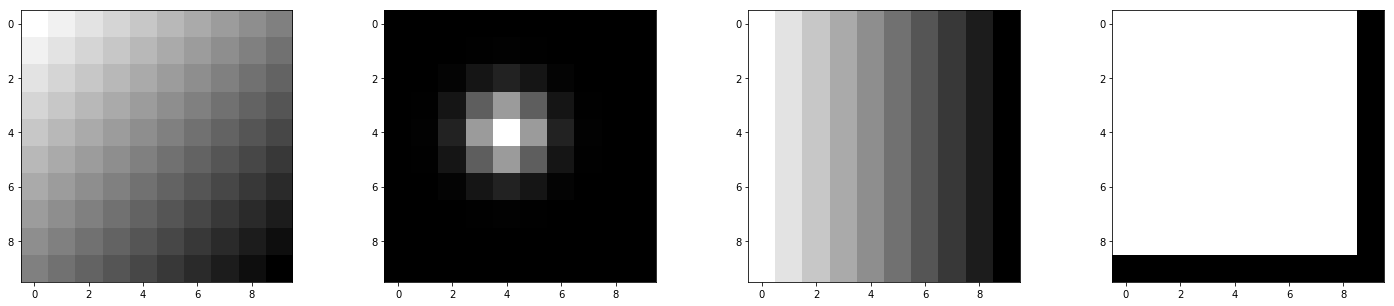

In [240]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


f0 = 1 # constant


# Define spatial functions
def func1(x,y):
    return 20*np.sin(2*np.pi*f0*x)+20*np.sin(2*np.pi*f0*y)
def func2(x,y):
    return 2*np.exp(-(((x-5)**2/2) + ((y-5)**2/2)))
def func3(x, y):
    return 20*np.sin(2*np.pi*f0*x)  
def func4(x,y):
    conds = [
        np.logical_and(np.logical_and(-10 < x, x < 10), np.logical_and(-10 < y, y < 10)),
    ]

    return np.piecewise(x, conds, [1, 0])

x = np.linspace(1, 10, 10)
y = np.linspace(1, 10, 10)

X, Y = np.meshgrid(x, y)
func1 = func1(X, Y)
func2 = func2(X, Y)
func3 = func3(X, Y)
func4 = func4(X, Y)

# Plot the images
fig = plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
plt.imshow(func1, cmap="gray")
plt.subplot(1,4,2)
plt.imshow(func2, cmap="gray")
plt.subplot(1,4,3)
plt.imshow(func3, cmap="gray")
plt.subplot(1,4,4)
plt.imshow(func4, cmap="gray")

plt.show()


#fig = plt.figure(figsize=(16,5))

#ax = fig.add_subplot(1, 4, 1, projection='3d')
#ax.contour3D(X, Y, func1, 50, cmap='gray')
#ax.set_title('Function 1')

#ax = fig.add_subplot(1, 4, 2, projection='3d')
#ax.contour3D(X, Y, func2, 50, cmap='gray')
#ax.set_title('Function 2')

#ax = fig.add_subplot(1, 4, 3, projection='3d')
#ax.contour3D(X, Y, func3, 50, cmap='gray')
#ax.set_title('Function 3')


#ax = fig.add_subplot(1, 4, 4, projection='3d')
#ax.contour3D(X, Y, func4, 50, cmap='gray')
#ax.set_title('Function 4')

Text(0.5, 1.0, 'Function 4')

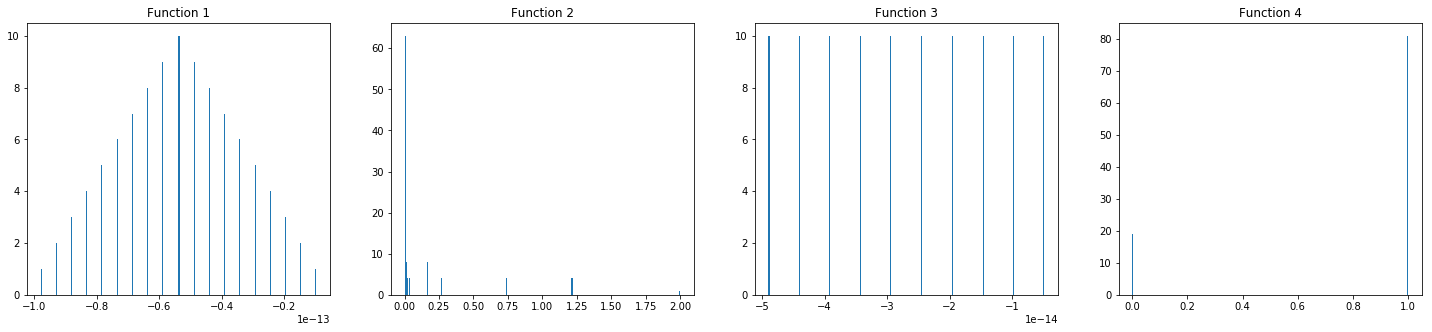

In [241]:
# Plot the histograms of the image

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(1, 4, 1)
ax.hist(func1.ravel(), bins=256)
ax.set_title('Function 1')
ax = fig.add_subplot(1, 4, 2)
ax.hist(func2.ravel(), bins=256)
ax.set_title('Function 2')
ax = fig.add_subplot(1, 4, 3)
ax.hist(func3.ravel(), bins=256)
ax.set_title('Function 3')
ax = fig.add_subplot(1, 4, 4)
ax.hist(func4.ravel(), bins=256)
ax.set_title('Function 4')

Text(0.5, 1.0, 'Function 4')

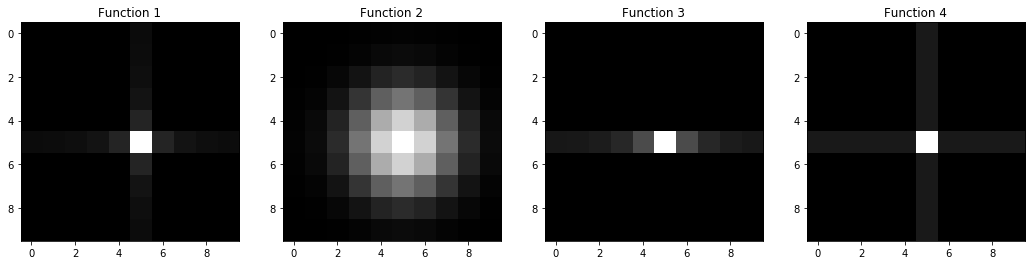

In [242]:
Tlines1=np.shape(func1)[0]
Trows1=np.shape(func1)[1]
Tlines2=np.shape(func2)[0]
Trows2=np.shape(func2)[1]
Tlines3=np.shape(func3)[0]
Trows3=np.shape(func3)[1]
Tlines4=np.shape(func4)[0]
Trows4=np.shape(func4)[1]

# This DFT will be too large for visualization so we will need to normalize logarithmically so we import
from matplotlib.colors import LogNorm

# We use fft2 function in numpy for the 2D DFT
ImageFFT1=np.fft.fft2(func1)
ImageFFT2=np.fft.fft2(func2)
ImageFFT3=np.fft.fft2(func3)
ImageFFT4=np.fft.fft2(func4)

# And this is a complex number so we obtain the magnitude and we divide by the total number of samples
ImageFFTMag1=abs(ImageFFT1)*2/Tlines1*2/Trows1    # Note that fft is now normalized by 2/N and 2/M with an image NxM
ImageFFTMag2=abs(ImageFFT2)*2/Tlines2*2/Trows2
ImageFFTMag3=abs(ImageFFT3)*2/Tlines3*2/Trows3
ImageFFTMag4=abs(ImageFFT4)*2/Tlines4*2/Trows4

# The 2D FFT, just as the 1D is repeated in 2 dimensions, if we want to see an image we need to shift it
ImageFFTMagShift1=np.fft.fftshift(ImageFFTMag1)
ImageFFTMagShift2=np.fft.fftshift(ImageFFTMag2)
ImageFFTMagShift3=np.fft.fftshift(ImageFFTMag3)
ImageFFTMagShift4=np.fft.fftshift(ImageFFTMag4)

# Plot
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1, 4, 1)
plt.imshow(ImageFFTMagShift1, cmap='gray')
ax.set_title('Function 1')
ax = fig.add_subplot(1, 4, 2)
plt.imshow(ImageFFTMagShift2, cmap='gray')
ax.set_title('Function 2')
ax = fig.add_subplot(1, 4, 3)
plt.imshow(ImageFFTMagShift3, cmap='gray')
ax.set_title('Function 3')
ax = fig.add_subplot(1, 4, 4)
plt.imshow(ImageFFTMagShift4, cmap='gray')
ax.set_title('Function 4')